# 목차
## 1. DecisionTree
## 2. RandomForest

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
feature_name_df = pd.read_csv("./human_activity/features.txt", sep='\s+',
                             header=None, names=['column_index', 'column_name'])
feature_name_df

,column_index,column_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y
...,...,...
556,557,"angle(tBodyGyroMean,gravityMean)"
557,558,"angle(tBodyGyroJerkMean,gravityMean)"
558,559,"angle(X,gravityMean)"
559,560,"angle(Y,gravityMean)"


In [3]:
feature_name_df['column_name'].unique().shape

(477,)

feature_name_df의 속성값과 데이터 프레임의 열 개수의 차이가 있다. 이는 중복된 값이 존재한다는 의미
중복된 피처명을 이용해서 데이터 파일을 데이터프레임에 로드하면 오류가 발생한다.

In [4]:
feature_name = feature_name_df.iloc[:,1].values.tolist()

In [5]:
print('전체 피처명에서 10개만 추출:\n', feature_name_df[:10])

전체 피처명에서 10개만 추출:
    column_index        column_name
0             1  tBodyAcc-mean()-X
1             2  tBodyAcc-mean()-Y
2             3  tBodyAcc-mean()-Z
3             4   tBodyAcc-std()-X
4             5   tBodyAcc-std()-Y
5             6   tBodyAcc-std()-Z
6             7   tBodyAcc-mad()-X
7             8   tBodyAcc-mad()-Y
8             9   tBodyAcc-mad()-Z
9            10   tBodyAcc-max()-X


In [6]:
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index'] > 1].count())
feature_dup_df[feature_dup_df['column_index'] > 1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [7]:
x = pd.DataFrame(data=feature_name_df.groupby('column_name').cumcount(),
                                 columns=['dup_cnt'])
x

,dup_cnt
0,0
1,0
2,0
3,0
4,0
...,...
556,0
557,0
558,0
559,0


In [8]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                 columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x: x[0]+'_'+
                                                                                              str(x[1]) if x[1] > 0 else x[0], axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [9]:
df = pd.DataFrame([['a'], ['a'], ['a'], ['b'], ['b'], ['a']],
                 columns=['A'])
df

,A
0,a
1,a
2,a
3,b
4,b
5,a


In [10]:
df.groupby('A').cumcount()

0    0
1    1
2    2
3    0
4    1
5    3
dtype: int64

In [11]:
def get_human_dataset():
    # 각 데이터 파일이 공백으로 분리되어 있어, 공백문자를 sep로 할당
    feature_name_df = pd.read_csv('./human_activity/features.txt', sep='\s+',
                                 header=None, names=['column_index', 'column_name'])
    # 중복 이름 변경
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    x_train = pd.read_csv('human_activity/train/X_train.txt', sep='\s+', names=feature_name)
    x_test = pd.read_csv('human_activity/test/X_test.txt', sep='\s+', names=feature_name)
    
    y_train = pd.read_csv('human_activity/train/y_train.txt', sep='\s+', header=None, names=['action'])
    y_test = pd.read_csv('human_activity/test/y_test.txt', sep='\s+', header=None, names=['action'])
    
    return x_train, x_test, y_train, y_test

In [12]:
x_train, x_test, y_train, y_test = get_human_dataset()

In [13]:
print('## 학습 피처 데이터 셋 info()')
print(x_train.info())

## 학습 피처 데이터 셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [14]:
y_train['action'].value_counts() / y_train.shape[0]

6    0.191376
5    0.186888
4    0.174918
1    0.166757
2    0.145947
3    0.134113
Name: action, dtype: float64

In [15]:
x_train

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.195034,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,0.013865,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339


In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [17]:
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(x_train, y_train)
pred = dt_clf.predict(x_test)
accuracy = accuracy_score(pred, y_test)
print("결정 트리 예측 정확도 : {0:.4f}".format(accuracy))

결정 트리 예측 정확도 : 0.8548


In [18]:
print('DecisionTreeClassifier 기본 하이퍼 파라미터 : \n', dt_clf.get_params())

DecisionTreeClassifier 기본 하이퍼 파라미터 : 
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 156, 'splitter': 'best'}


In [19]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [6, 8, 10, 12, 16, 20, 24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(x_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치 : {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터 : ', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:  1.2min finished


GridSearchCV 최고 평균 정확도 수치 : 0.8513
GridSearchCV 최적 하이퍼 파라미터 :  {'max_depth': 16}


In [20]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.850791
1,8,0.851069
2,10,0.851209
3,12,0.844135
4,16,0.851344
5,20,0.850800
6,24,0.849440


In [21]:
max_depths = [6, 8, 10, 12, 16, 20, 24]

for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=156)
    dt_clf.fit(x_train, y_train)
    pred = dt_clf.predict(x_test)
    accuracy = accuracy_score(y_test, pred)
    print('max_depth = {0}, 정확도 : {1}'.format(depth, accuracy))

max_depth = 6, 정확도 : 0.8557855446216491
max_depth = 8, 정확도 : 0.8707159823549372
max_depth = 10, 정확도 : 0.8673227010519172
max_depth = 12, 정확도 : 0.8646080760095012
max_depth = 16, 정확도 : 0.8574821852731591
max_depth = 20, 정확도 : 0.8547675602307431
max_depth = 24, 정확도 : 0.8547675602307431


In [22]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [6, 8, 10, 12, 16, 20, 24],
    'min_samples_split' : [16, 24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(x_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치 : {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터 : ', grid_cv.best_params_)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:  2.4min finished


GridSearchCV 최고 평균 정확도 수치 : 0.8549
GridSearchCV 최적 하이퍼 파라미터 :  {'max_depth': 8, 'min_samples_split': 16}


In [23]:
max_depths = [6, 8, 10, 12, 16, 20, 24]
min_samples_split = [16, 24]

for depth in max_depths:
    for split in min_samples_split:
        dt_clf = DecisionTreeClassifier(max_depth=depth, min_samples_split=split,random_state=156)
        dt_clf.fit(x_train, y_train)
        pred = dt_clf.predict(x_test)
        accuracy = accuracy_score(y_test, pred)
        print('max_depth = {0}, min_samples_split = {1},정확도 : {2}'.format(depth, split, accuracy))

max_depth = 6, min_samples_split = 16,정확도 : 0.8551068883610451
max_depth = 6, min_samples_split = 24,정확도 : 0.8551068883610451
max_depth = 8, min_samples_split = 16,정확도 : 0.8717339667458432
max_depth = 8, min_samples_split = 24,정확도 : 0.8696979979640312
max_depth = 10, min_samples_split = 16,정확도 : 0.8598574821852731
max_depth = 10, min_samples_split = 24,정확도 : 0.8601968103155752
max_depth = 12, min_samples_split = 16,정확도 : 0.8571428571428571
max_depth = 12, min_samples_split = 24,정확도 : 0.8578215134034611
max_depth = 16, min_samples_split = 16,정확도 : 0.8598574821852731
max_depth = 16, min_samples_split = 24,정확도 : 0.8506956226671191
max_depth = 20, min_samples_split = 16,정확도 : 0.8564642008822532
max_depth = 20, min_samples_split = 24,정확도 : 0.8506956226671191
max_depth = 24, min_samples_split = 16,정확도 : 0.8564642008822532
max_depth = 24, min_samples_split = 24,정확도 : 0.8506956226671191


# 랜덤 포레스트

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [25]:
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(x_train, y_train)
pred = rf_clf.predict(x_test)
accuracy = accuracy_score(pred, y_test)
print('랜덤 포레스트 정확도 : {:.4f}'.format(accuracy))

랜덤 포레스트 정확도 : 0.9253


In [26]:
from sklearn.model_selection import GridSearchCV

In [32]:
# param_grid of GridSearchCV
params = {
    'n_estimators' : [300],
    'max_depth' : [6, 8, 10, 12],
    'min_samples_leaf' : [8, 12, 18],
    'min_samples_split' : [8, 16, 20]
}

In [33]:
# RandomForest 모델 학습
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1, scoring='accuracy', verbose=1)
grid_cv.fit(x_train, y_train)

Fitting 2 folds for each of 36 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   49.7s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:  1.7min finished


GridSearchCV(cv=2, estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10, 12],
                         'min_samples_leaf': [8, 12, 18],
                         'min_samples_split': [8, 16, 20],
                         'n_estimators': [300]},
             scoring='accuracy', verbose=1)

In [34]:
print('최적의 하이퍼 파라미터 : \n', grid_cv.best_params_)
print('최고 예측 정확도 : ', grid_cv.best_score_)

최적의 하이퍼 파라미터 : 
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 300}
최고 예측 정확도 :  0.9144450489662677


In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [39]:
rf_clf = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_split=8, min_samples_leaf=8)
rf_clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=8, min_samples_split=8,
                       n_estimators=300)

In [40]:
# feature_importances_
rf_importances_values = rf_clf.feature_importances_
#index는 features명이므로 data.columns로 설정
rf_importances = pd.Series(rf_importances_values, index=x_train.columns)
rf_top20 = rf_importances.sort_values(ascending=False)[:20]

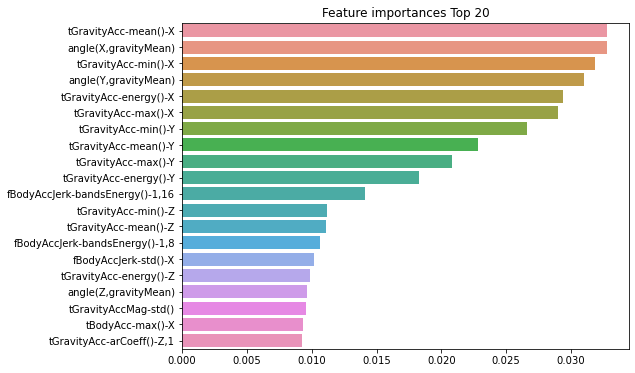

In [43]:
plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 20')
sns.barplot(x=rf_top20, y=rf_top20.index)
plt.show()